16000
Процент самого глубокого снижения (от стартовой цены): 
 35.699999999999996 %

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Время расчетов в секундах:  70.37343087800002
Result TAB 
        Date     Price  p_sell  p_buy  day_profit  total_profit sell/buy  \
0  0.000000  0.000000    0.01   0.01     -1000.0           0.0      buy   
1  0.010027  0.324819    0.36   0.28     31482.0       31482.0     sell   
2  0.020055  0.503972    0.55   0.43       552.0       32033.0     sell   
3  0.030082  0.499433    0.55   0.43         0.0       32033.0  waiting   
4  0.040110  0.725461    0.80   0.62       439.0       32473.0     sell   

   count_sell  count_buy  count_total_buy  costs_of_bying  sum_invested  
0        0.00   100000.0         100000.0

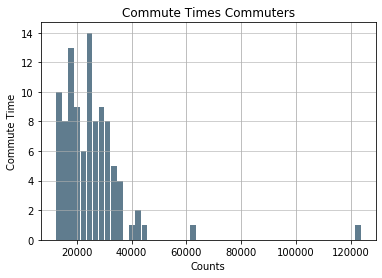

In [6]:
import pandas as pd
import math as m
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer


def  OUP_generator(mu, sigma, T, dt, tau):
    n = int(T / dt)  # Number of time steps.
    t = np.linspace(0., T, n)  # Vector of times.
    sigma_bis = sigma * np.sqrt(2. / tau)
    sqrtdt = np.sqrt(dt)
    x = np.zeros(n)

    for i in range(n - 1):
        x[i + 1] = x[i] + dt * (-(x[i] - mu) / tau) + \
            sigma_bis * sqrtdt * np.random.randn()

    return t, x

def prod(j, array):
    p = 1
    if j == 0:
        return p * (1 - array[0])
    else:
        return prod(j-1, array) * (1-array[j])


def transform_csv(df):

    # print("Кол-во строк в таблице (старт): \n", len(df), "\n")
    # print("Таблица (оглавление) (старт): \n", df.head(10), "\n")

    df['p_sell'] = 0
    df['p_buy'] = 0
    df['day_profit'] = 0
    df['total_profit'] = 0
    df['sell/buy'] = 0
    df['count_sell'] = 0
    df['count_buy'] = 0
    df['count_total_buy'] = 0
    df['costs_of_bying'] = 0
    df['sum_invested'] = 0

    # print("Таблица (оглавление) (после добавления столбцов): \n", df.head(), "\n")



def model_5k(df):

    column_p_sell = 'p_sell'
    column_p_buy = 'p_buy'
    column_price = 'Price'
    column_sell_buy = 'sell/buy'
    column_day_profit = 'day_profit'
    column_profit = 'total_profit'
    column_count_sell = 'count_sell'
    column_count_buy = 'count_buy'
    column_count_total_buy = 'count_total_buy'
    column_costs_of_bying = 'costs_of_bying'
    column_sum_invested = 'sum_invested'
    column_ticker = 'ticker'

    p0 = df.loc[0, column_price]+0.01

    # визначаємо яку кількість акцій потрібно купувати на відповідному етапі докуповування
    number = []
    for j in range(0, len(amounts_S)):
        if j == 0:
            number.append(amounts_S[j] / p0)
        else:
            number.append(amounts_S[j] / (p0 * prod(j, procent)))

    k0 = number[0]
    K = k0
    S0 = k0 * p0
    C = S0
    Profit = 0
    t = 0
    p_sell = p0 * (1 + r / 100)
    p_buy = p0 * (1 - procent[1])

    df.loc[0, column_p_sell] = p_sell
    df.loc[0, column_p_buy] = p_buy
    df.loc[0, column_sell_buy] = 'buy'
    df.loc[0, column_day_profit] = K * df.loc[0, column_price] - C
    df.loc[0, column_profit] = Profit
    df.loc[0, column_count_buy] = k0
    df.loc[0, column_count_total_buy] = K
    df.loc[0, column_costs_of_bying] = S0
    df.loc[0, column_sum_invested] = C

    for i in range(1, len(df)):
        count_days[t] = count_days[t] + 1
        # count_days

        if df[column_price][i] > p_sell:
            if t < len(amounts_S):
                count_step[t] = count_step[t] + 1
                # count_step
                size_profit[t] = size_profit[t] + K * df[column_price][i] - C
                # size_profit
            else:
                pass
            Profit = Profit + (K * df[column_price][i] - C)
            df.loc[i, column_profit] = Profit
            df.loc[i, column_count_sell] = K

            p0 = df[column_price][i]
            p_sell = p0 * (1 + r / 100)
            p_buy = p0 * (1 - procent[1])

            df.loc[i, column_p_sell] = p_sell
            df.loc[i, column_p_buy] = p_buy
            df.loc[i, column_sell_buy] = 'sell'
            df.loc[i, column_day_profit] = K * df.loc[i, column_price] - C
            df.loc[i, column_sum_invested] = C

            number = []
            for j in range(0, len(amounts_S)):
                if j == 0:
                    number.append(amounts_S[j] / p0)
                else:
                    number.append(amounts_S[j] / (p0 * prod(j, procent)))
            k0 = number[0]
            K = k0
            S0 = k0 * p0
            C = S0
            t = 0

        elif df[column_price][i] < p_buy:
            t = t + 1

            if t < len(amounts_S):
                k0 = number[t]
                K = K + k0
                p0 = df[column_price][i]
                S0 = k0 * p0
                C = C + S0

                p_sell = (C / K) * (1 + r_fin / 100)

                if (t + 1) < len(amounts_S):
                    p_buy = p0 * (1 - procent[1])
                else:
                    p_buy = p0 * (1 - procent_loss / 100)

                df.loc[i, column_p_sell] = p_sell
                df.loc[i, column_p_buy] = p_buy
                df.loc[i, column_profit] = Profit
                df.loc[i, column_sell_buy] = 'buy'
                df.loc[i, column_count_buy] = k0
                df.loc[i, column_count_total_buy] = K
                df.loc[i, column_costs_of_bying] = S0
                df.loc[i, column_sum_invested] = C

            elif t == len(amounts_S):
                count_step[t] = count_step[t] + 1
                count_step
                df.loc[i, column_day_profit] = K * df.loc[i, column_price] - C
                size_profit[t] = size_profit[t] + K * df[column_price][i] - C
                df.loc[i, column_sell_buy] = 'StopLoss'
                df.loc[i, column_count_sell] = K
                df.loc[i, column_sum_invested] = C

                Profit = Profit + K * df[column_price][i] - C
                df.loc[i, column_profit] = Profit

                p0 = df[column_price][i]
                p_sell = p0 * (1 + r / 100)
                p_buy = p0 * (1 - procent[1])

                df.loc[i, column_p_sell] = p_sell
                df.loc[i, column_p_buy] = p_buy

                number = []
                for j in range(0, len(amounts_S)):
                    if j == 0:
                        number.append(amounts_S[j] / p0)
                    else:
                        number.append(amounts_S[j] / (p0 * prod(j, procent)))
                #                 print('Stoploss', K * df[column_price][i] - C)
                k0 = number[0]
                K = k0
                C = k0 * p0
                t = 0
        else:
            df.loc[i, column_p_sell] = df.loc[i - 1, column_p_sell]
            df.loc[i, column_p_buy] = df.loc[i - 1, column_p_buy]
            df.loc[i, column_profit] = Profit
            df.loc[i, column_sum_invested] = C
            df.loc[i, column_sell_buy] = 'waiting'

    df['day_profit'] = round(df['day_profit'], 0)
    df['total_profit'] = round(df['total_profit'], 0)
    #     df['Date'] = pd.to_datetime(df['Date'], format="%Y/%m/%d")
    df['p_buy'] = round(df['p_buy'], 2)
    df['p_sell'] = round(df['p_sell'], 2)
    df['count_buy'] = round(df['count_buy'], 2)
    df['count_sell'] = round(df['count_sell'], 2)
    df['count_total_buy'] = round(df['count_total_buy'], 2)
    df['costs_of_bying'] = round(df['costs_of_bying'], 2)
    df['sum_invested'] = round(df['sum_invested'], 2)

    return df, Profit


# START
start = timer()



sigma = 0.5  # Standard deviation.
mu = 10.  # Mean.
tau = .5  # Time constant.
dt = .01  # Time step.
T = 3.65  # Total time.
S0 = 1000
count_experiment = 100


procent = [0, 0.15, 0.20, 0.25, 0.30]
amounts_S = [1000,1000,2000,4000,8000]
print(sum(amounts_S))
r_fin = 10
procent_loss = 2
r = 10
count_step = [0]*(len(amounts_S) + 1)
size_profit = [0]*(len(amounts_S) + 1)
count_days = [0]*(len(amounts_S) + 1)

file_result_name = 'Result_Coins_2020_02_17_Art.csv'

print("Процент самого глубокого снижения (от стартовой цены): \n", prod(4, procent)*100, "%\n")

# d = {'Date': [1, 2], 'Price': [3, 4]}
# df = pd.DataFrame(data=d)

profits_generated = np.zeros(count_experiment)
total_profit = 0

for i in range(0, count_experiment):
    oup_t, oup_S = OUP_generator(mu, sigma, T, dt, tau)
    d = {'Date': oup_t, 'Price': oup_S}
    df = pd.DataFrame(data=d)
    transform_csv(df)
    df, profit = model_5k(df)
    profits_generated[i] = profit
    total_profit = total_profit + profit
    print(i)
    #print(total_profit)
    #print(np.mean(profits_generated))


duration = timer() - start
print("Время расчетов в секундах: ", duration)

print("Result TAB \n", df.head(), "\n")

df.to_csv(file_result_name, sep = ';', index=False,)
print("Файл создан: \n", file_result_name, "\n")


Result = df[['Date','total_profit']]
print(Result, profit)
print(profits_generated)
print(total_profit)
print(np.mean(profits_generated))


print("Математическое ожидание: ", np.mean(profits_generated))
print("Математическое ожидание в %: ", np.mean(profits_generated)/sum(amounts_S)*100, " %")




# Generate data on commute times.
# size, scale = 1000, 10
commutes = pd.Series(profits_generated)

commutes.plot.hist(grid=True, bins=50, rwidth=0.9,
                   color='#607c8e')
plt.title('Commute Times Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)
plt.show()